In [1]:
import pandas as pd


db = pd.read_csv('datos.csv')
db.head()

db['Año'] = pd.to_datetime(db['Año'], format='%Y')
db['Año'] = db['Año'].dt.year

db = db[['ID', 'Año', 'Pais', 'Muertes']]

#set the id NaN as the first three letters of Pais
db['ID'] = db['ID'].fillna(db['Pais'].str[:3].str.upper())

db



,ID,Año,Pais,Muertes
0,OWID_ABK,1989,Abkhazia,0
1,OWID_ABK,1990,Abkhazia,0
2,OWID_ABK,1991,Abkhazia,0
3,OWID_ABK,1992,Abkhazia,0
4,OWID_ABK,1993,Abkhazia,0
...,...,...,...,...
6965,ZWE,2018,Zimbabwe,0
6966,ZWE,2019,Zimbabwe,0
6967,ZWE,2020,Zimbabwe,0
6968,ZWE,2021,Zimbabwe,0


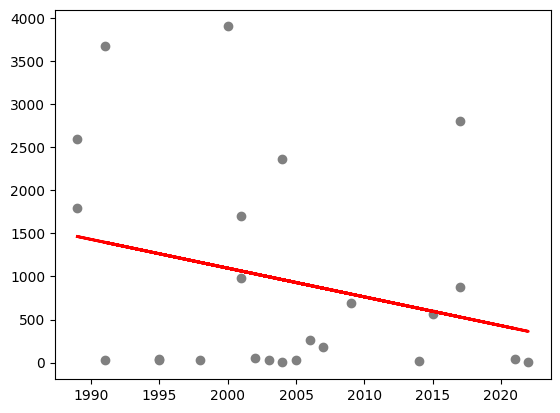

Mean Squared Error: 1394936.1840717336
Next year prediction: [362.13955387]
2022 prediction: [362.13955387]
2023 prediction: [328.76023008]
2024 prediction: [295.38090629]
2025 prediction: [262.0015825]
2026 prediction: [228.62225871]
2027 prediction: [195.24293492]
2028 prediction: [161.86361114]
2029 prediction: [128.48428735]
2030 prediction: [95.10496356]
2031 prediction: [61.72563977]
BRA Mean Squared Error: 550221.7146448328
BRA Next year prediction: [1832.25359755]
BRA 2022 prediction: [1832.25359755]
BRA 2023 prediction: [1912.65404577]
BRA 2024 prediction: [1993.05449398]
BRA 2025 prediction: [2073.4549422]
BRA 2026 prediction: [2153.85539042]
BRA 2027 prediction: [2234.25583864]
BRA 2028 prediction: [2314.65628686]
BRA 2029 prediction: [2395.05673508]
BRA 2030 prediction: [2475.4571833]
BRA 2031 prediction: [2555.85763152]
CAN Mean Squared Error: 9.0
CAN Next year prediction: [24.]
CAN 2022 prediction: [24.]
CAN 2023 prediction: [24.]
CAN 2024 prediction: [24.]
CAN 2025 predi

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWa

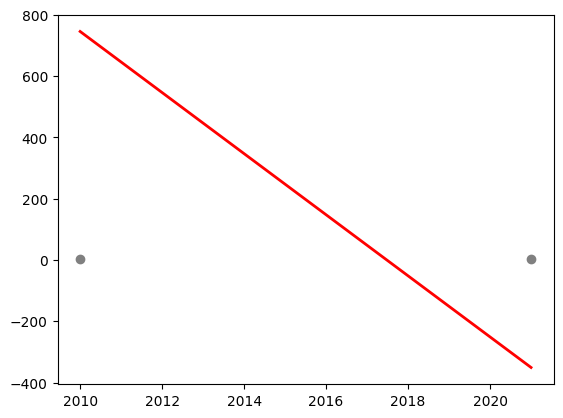

In [3]:
#implement linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
 
#add by country and year

db['Muertes'] = pd.to_numeric(db['Muertes'], errors='coerce')
db = db.groupby(['ID', 'Año']).sum().reset_index()
db = db[db['Muertes'] > 0]
#filter by big countries
db = db[db['ID'].isin(['USA', 'CHN', 'RUS', 'IND', 'BRA', 'JPN', 'DEU', 'CAN', 'FRA', 'GBR'])]

#split the data

X = db[['Año']]

y = db['Muertes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train the model

model = LinearRegression()

model.fit(X_train, y_train)

#predict

y_pred = model.predict(X_test)

#plot

plt.scatter(X_test, y_test, color='gray')

plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()

#evaluate

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

#predict the next year

print('Next year prediction:', model.predict([[2022]]))

#predict the next 10 years

for i in range(2022, 2032):

    print(f'{i} prediction:', model.predict([[i]]))

#predict the next 10 years for each country

for country in db['ID'].unique():

    db_country = db[db['ID'] == country]

    X = db_country[['Año']]

    y = db_country['Muertes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'{country} Mean Squared Error:', mean_squared_error(y_test, y_pred))

    print(f'{country} Next year prediction:', model.predict([[2022]]))

    for i in range(2022, 2032):

        print(f'{country} {i} prediction:', model.predict([[i]]))

#plot 

plt.scatter(X_test, y_test, color='gray')
    
plt.plot(X_test, y_pred, color='red', linewidth=2)
    
plt.show()







